**Лабараторная работа №2**


Храмцовой Дарьи Алексеевны 

Группа: 18-ИВТ-3


 **Вариант 40. Wine**
 
 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
 
2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

7.Заполните пропущенные значения в данных;

8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


**Кодировка классификаторов:**

1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);

**2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);**

3 – линейный классификатор (персептрон);

**4 – логический классификатор (бинарное решающее дерево).**

 


**1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных .**

In [135]:
import pandas as pd
%matplotlib inline


In [136]:
wine = pd.read_csv('wine.data.txt')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [137]:
wine.shape

(178, 14)

In [138]:
wine.nunique()

Class                             3
Alcohol                         126
Malic acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

1.Alcohol - содержание в процентах

2.Malic acid - содержание яблочной кислоты

3.Ash - зольность

4.Alcalinity of ash  - содержание щелочи 

5.Magnesium - содержание магния

6.Total phenols - общие фенолы

7.Flavanoids - флаваноиды

8.Nonflavanoid phenols - нефлаваноидные фенолы

9.Proanthocyanins - проантоцианы

10.Color intensity - интенсивность цвета

11.Hue - оттенок

12.OD280/OD315 of diluted wines -  разбавленность

13.Proline -  сорт




**2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;**

In [139]:
print("Размер набора данных до удаления дубликатов: ", wine.shape)
print("Размер набора данных после удаления дубликатов:", wine.drop_duplicates().dropna().shape) 

Размер набора данных до удаления дубликатов:  (178, 14)
Размер набора данных после удаления дубликатов: (178, 14)


**3.Оцените сбалансированность данных по классам (постройте гистограмму)**

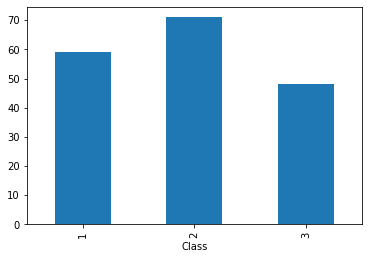

In [140]:
wine.groupby(["Class"])["Class"].count().plot(kind='bar')

**4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)**

In [141]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
wine['Class'] =wine['Class'].apply(lambda x: str(x))
signs = [i for i in wine.columns if wine[i].dtype.name != 'object']
print('Количественные признаки: ', signs)


Количественные признаки:  ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']


До масштабирования

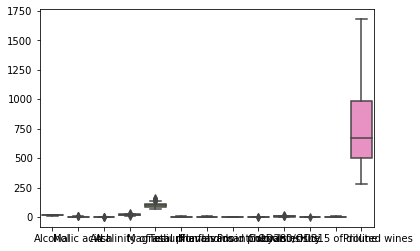

In [142]:
signs = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']
sns.boxplot(data=wine[signs])
plt.show()

После масштабирования

In [143]:
wine[signs] = MinMaxScaler().fit_transform(wine[signs])
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


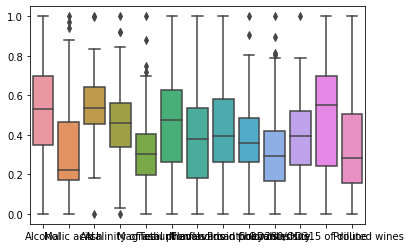

In [144]:
signs = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']
sns.boxplot(data=wine[signs])
plt.show()

**5.Выполните замену категориальных признаков**


In [145]:
wine['Class'] =wine['Class'].apply(lambda x: str(x))
signs2 = [i for i in wine.columns if wine[i].dtype.name == 'object']
print('Категориальные признаки: ', signs2)

Категориальные признаки:  ['Class']


In [146]:
for i in signs2:
    print(i,': ', wine[i].unique())

Class :  ['1' '2' '3']


In [147]:
wine.groupby(["Class"])["Class"].count()

Class
1    59
2    71
3    48
Name: Class, dtype: int64

In [148]:
wine_nonbinary = pd.get_dummies(wine[signs2])
wine.drop(signs2, axis=1, inplace=True)
wine = pd.concat([wine_nonbinary, wine] , axis=1)
wine.shape
wine.head()

,Class_1,Class_2,Class_3,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0,0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0,0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0,0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0,0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0,0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


**6.Оцените корреляцию**

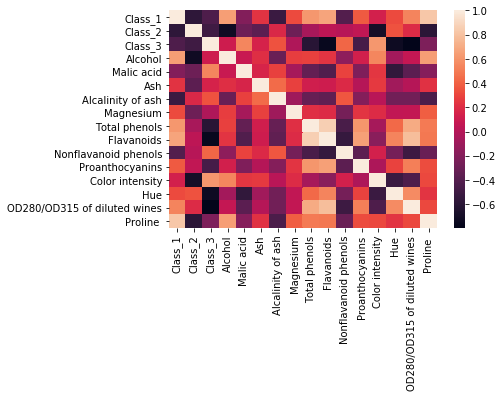

In [149]:
import seaborn as sns
corr = wine.corr()
sns.heatmap(corr)

**7.Заполните пропущенные значения в данных**

In [150]:
wine.count()

Class_1                         178
Class_2                         178
Class_3                         178
Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline                         178
dtype: int64

Пропущенных значений в данных нет

**8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.**

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.33, random_state=0)
print('Training ', x_test.shape)
print('Test ', x_test.shape)

Training  (50, 4)
Test  (50, 4)


In [35]:
wine.columns


Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

**Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)**

In [130]:
iris = datasets.load_iris()
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.33, random_state=0)
rnc = RadiusNeighborsClassifier()
rnc_grid = GridSearchCV(rnc, {'radius': [2, 3, 4],'weights': ['uniform', 'distance']})
rnc_grid.fit(x_train, y_train)
y_score = rnc_grid.best_estimator_.fit(x_train, y_train).predict(x_test)
print('Best : {}'.format(rnc_grid.best_score_))
print('Accuracy rnc: {}'.format(accuracy_score(y_score, y_test)))

Best : 0.96
Accuracy rnc: 0.96


**Логический классификатор (бинарное решающее дерево)**

In [131]:
dtc = DecisionTreeClassifier()
x, y = wine.drop('Class_3', axis=1), wine['Class_3']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)
dtc_grid = GridSearchCV(dtc,{'max_depth': list(range(1,12)), 'max_features': list(range(1,12))})
dtc_grid.fit (x_train, y_train)
best_score = dtc_grid.best_score_
dtc = DecisionTreeClassifier(max_depth=dtc_grid.best_estimator_.max_depth, max_features=dtc_grid.best_estimator_.max_features)
dtc.fit(x_train, y_train)
accuracy_score  = np.mean(y_test == dtc.predict(x_test))
print(' Best:', best_score)
print(' Accuracy dtc: %.5f' % accuracy_score)

 Best: 1.0
 Accuracy dtc: 0.98148


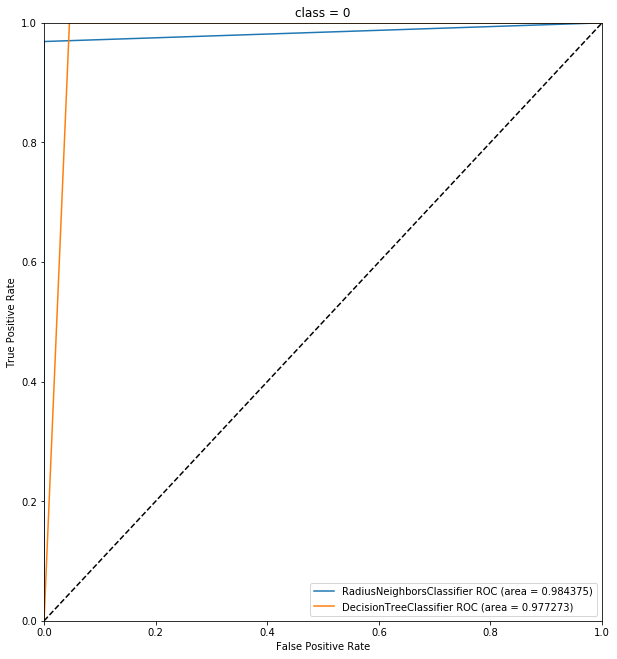

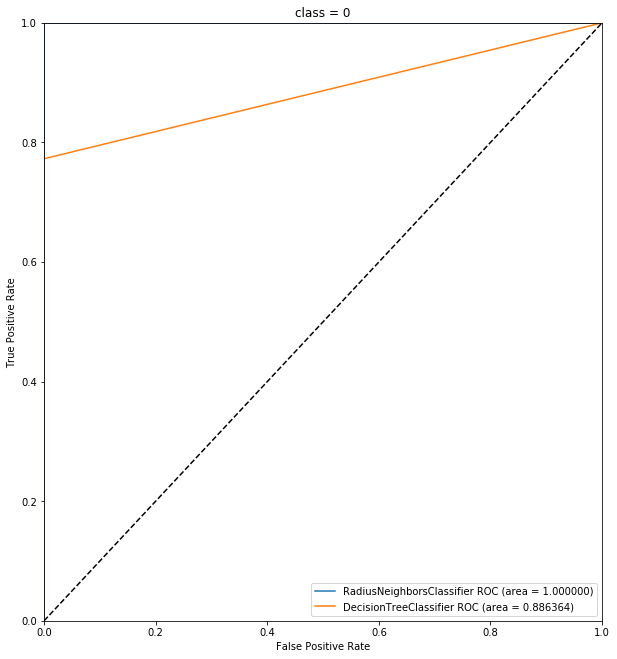

In [132]:

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth

plt.figure(figsize=(10,11))

rnc = RadiusNeighborsClassifier()
probas_rnc0 = rnc.fit(x_train, y_train).predict_proba (x_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(x_train, y_train).predict_proba (x_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class = 0')
plt.show()

plt.figure(figsize=(10,11))

rnc = RadiusNeighborsClassifier()
probas_rnc1 = rnc.fit(x_train, y_train).predict_proba (x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_rnc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

 

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class = 1')
plt.show()

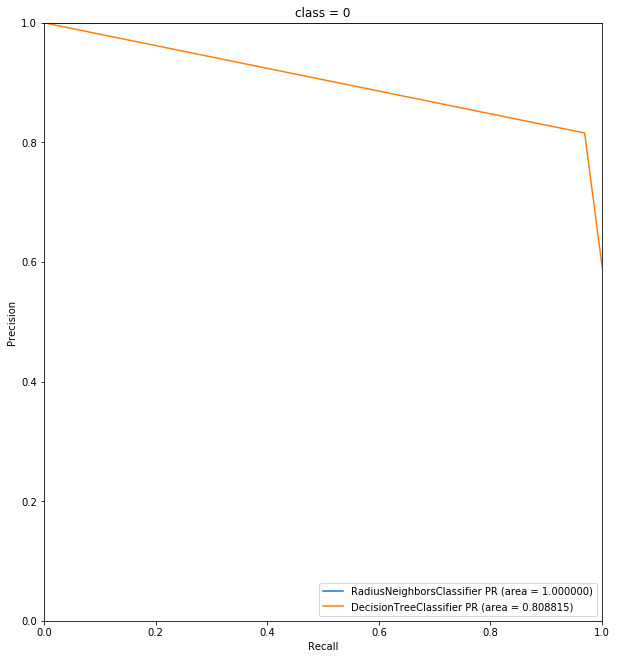

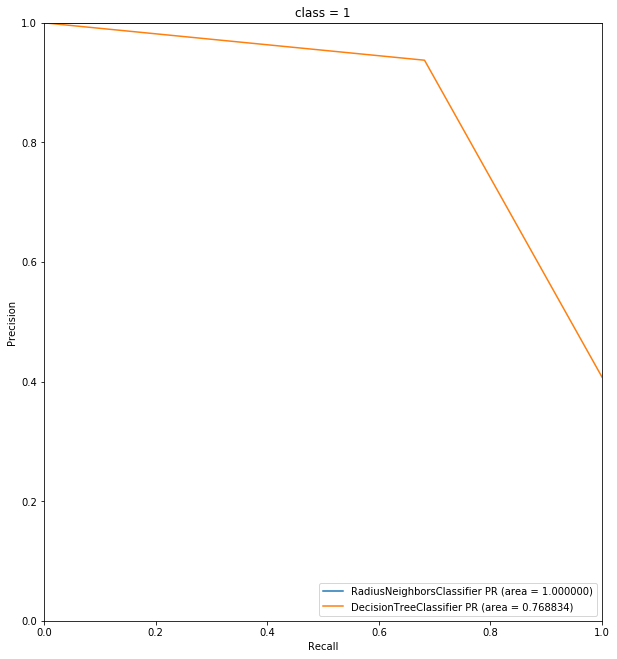

In [133]:
probas_rnc1 = rnc.fit(x_train, y_train).predict_proba (x_test)
probas_dtc1 = dtc.fit(x_train, y_train).predict_proba(x_test)
plt.figure(figsize=(10,11))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc1[:,0])
aps_rnc1 = average_precision_score(y_test_invers,probas_rnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc1)) 

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class = 0')
plt.show()


plt.figure(figsize=(10,11))

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc1[:,0])
aps_rnc1 = average_precision_score(y_test_invers,probas_rnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc1))

precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class = 1')
plt.show()
